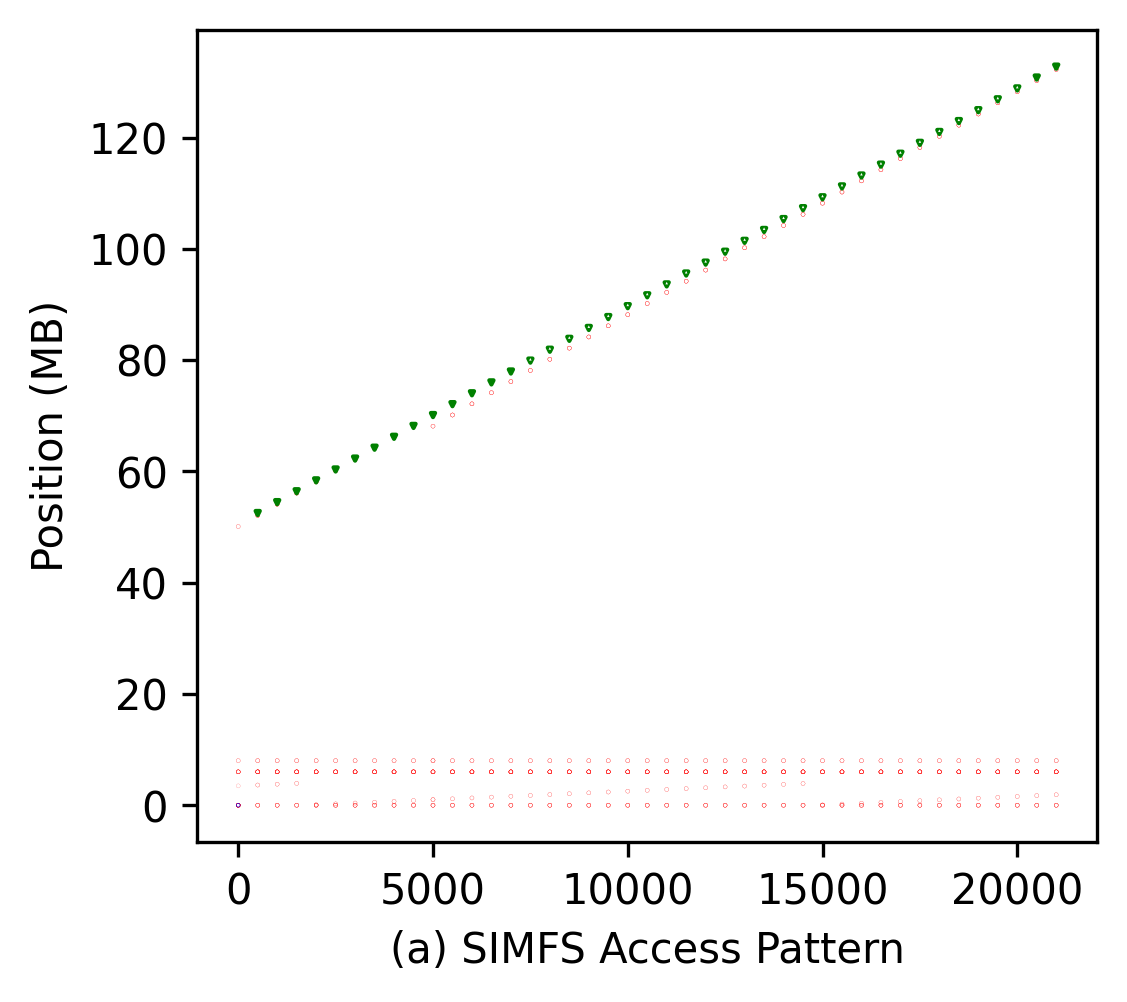

In [9]:
import matplotlib.pyplot as plt

def cm_to_inch(x):
    return x / 2.54

group = 25
NVM_TRACE_PREFIX = "NVM_"

with open("./pattern", 'r') as f:
    lines = f.readlines()
    trace = []
    for line in lines:
        if line.startswith("#"):
            continue
        line = line.strip()
        line:str = line[line.find(NVM_TRACE_PREFIX):]
        access_type = 0 if line.find("NVM_READ") != -1 else 1
        access_pos = line.split(" ")[-2][1:-1]
        access_len = line.split(" ")[-1]
        
        trace.append(
            {
                "type" : access_type,
                "pos": int(access_pos, base=16), 
                "len": int(access_len), 
            }
        )

tot = len(trace)

fig = plt.figure(dpi=300, figsize=(cm_to_inch(8.9 * 2), cm_to_inch(8 * 2)))

subfig = plt.subplot(2, 2, 1)
colors = ["red", "blue", "green"]

point_subsets_1 = [[], [], colors[0]]
point_subsets_2 = [[], [], colors[1]]
point_subsets_3 = [[], [], colors[2]]

for i in range(tot // group):
    if i % 500 != 0:
        continue
    for member in range(group):
        if i * group + member > tot:
            break
        type = trace[i * group + member]["type"]
        pos = trace[i * group + member]["pos"] / 1024 / 1024
        length = trace[i * group + member]["len"]
        
        if length <= 64:
            point_subsets_1[0].append(i)
            point_subsets_1[1].append(pos)
        elif length <= 128:
            point_subsets_2[0].append(i)
            point_subsets_2[1].append(pos)
        else:
            point_subsets_3[0].append(i)
            point_subsets_3[1].append(pos)
            
plt.scatter(point_subsets_1[0], point_subsets_1[1], c='none', edgecolors=point_subsets_1[2], marker="o", s=0.001)
plt.scatter(point_subsets_2[0], point_subsets_2[1], c='none', edgecolors=point_subsets_2[2], marker="D", s=0.001)
plt.scatter(point_subsets_3[0], point_subsets_3[1], c='none', edgecolors=point_subsets_3[2], marker="v", s=1)

# Low Area
# x = [20000:20010]
# figins = subfig.inset_axes((0.6, 0.2, 0.3, 0.3))
# figins.scatter(point_subsets_1[0][20000:20010], point_subsets_1[1][20000:20010], c='none', edgecolors=point_subsets_1[2], marker="o")
# # figins.scatter(point_subsets_2[0][20000:20010], point_subsets_2[1][20000:20010], c='none', edgecolors=point_subsets_1[2], marker="o")
# # figins.scatter(point_subsets_1[0][20000:20010], point_subsets_1[1][20000:20010], c='none', edgecolors=point_subsets_1[2], marker="o")
# figins.xaxis.set_visible(False)
# figins.yaxis.set_visible(False)


plt.ylabel("Position (MB)")
plt.xlabel("(a) SIMFS Access Pattern")

plt.tight_layout()
